In [ ]:
#conda install gdal -c conda-forge

In [12]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


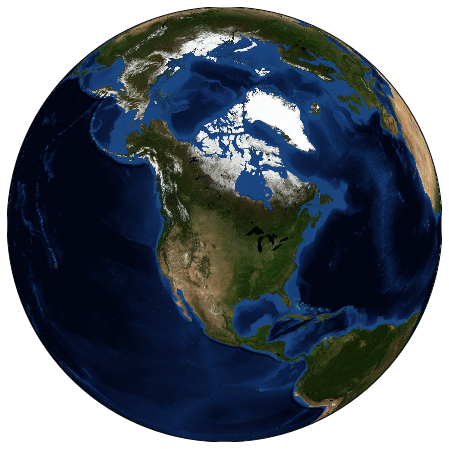

In [13]:
plt.figure(figsize=(8, 8))
m = Basemap(projection='ortho', resolution=None, lat_0=50, lon_0=-100)
m.bluemarble(scale=0.5);

In [3]:
#conda install basemap-data-hires

/Users/ricardoguevara/anaconda3/envs/tfComplejidad/lib/python3.7/site-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  
/Users/ricardoguevara/anaconda3/envs/tfComplejidad/lib/python3.7/site-packages/ipykernel_launcher.py:14: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  


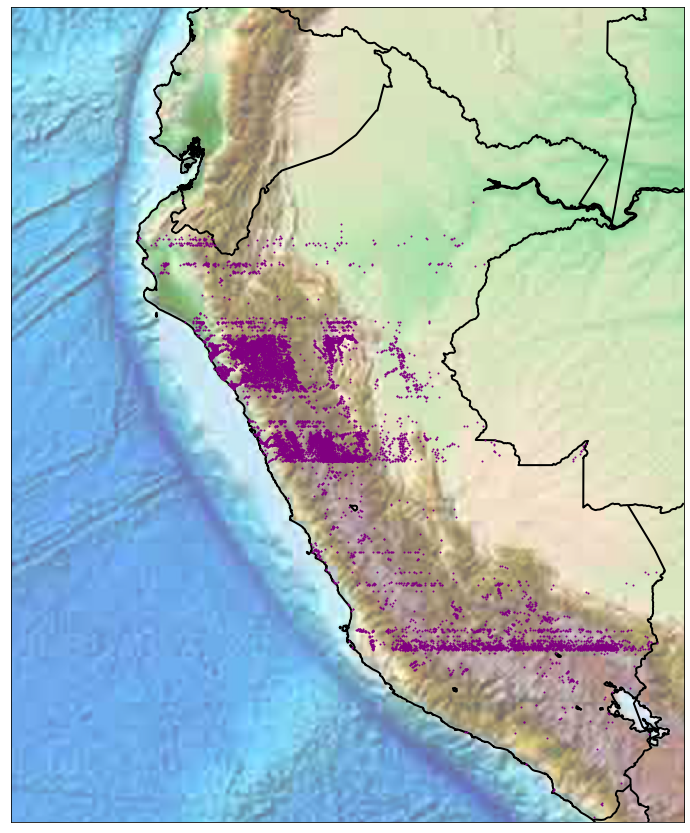

In [16]:
fig = plt.figure(figsize=(15, 15))
m = Basemap(projection='mill', resolution='h', 
            lat_0=-9.1899672, lon_0=-75.015152,llcrnrlat = -18.384377,
            llcrnrlon = -84.342834,
            urcrnrlat = 0.936457,
            urcrnrlon = -68.225205)
m.etopo(scale=4, alpha=0.6)

# Map (long, lat) to (x, y) for plotting
x, y = m(-72.531266212, -13.992029757)

m.drawcoastlines(linewidth=2)
m.drawcountries(linewidth=2)

pD, pla, c = readCPxDto('test20000.csv')
for i in range(len(pla)):
    d = pla[i]
    for j in range(len(c[d])):
        x, y = m(pD[d][j]['x'], pD[d][j]['y'])
        plt.plot(x, y,'ok',markersize=1,color='purple')
        #plt.text(x, y, pD[d][j]['name'], fontsize=7)
        del x
        del y

In [1]:
import heapq as hq
import math
import csv

def readCPxDto(fileName):
    dictionary = {}
    cp = {}
    places = []
    with open(fileName) as csvfile:
        file = csv.reader(csvfile, delimiter=',')
        idElem = -1
        for row in file:
            if idElem != -1:
                elem = {}
                elem["name"] = row[5]
                elem["x"] = float(row[15])
                elem["y"] = float(row[16])
                if row[1] not in dictionary:
                    dictionary[row[1]] = []
                    dictionary[row[1]].append(elem)
                    cp[row[1]] = []
                    cp[row[1]].append(elem['name'])
                    places.append(row[1])
                else:
                    dictionary[row[1]].append(elem)
                    cp[row[1]].append(elem['name'])
                del elem
            
            idElem += 1
        
    return dictionary, places, cp

In [4]:
d, p, c = readCPxDto('test20000.csv')
print (d)

{'JUNIN': [{'name': 'Campo Verde', 'x': -73.682631254, 'y': -11.23852662}, {'name': 'Manantial', 'x': -73.73216629, 'y': -11.052660631}, {'name': 'Señor de Los Milagros', 'x': -75.20981267, 'y': -12.05133309}, {'name': 'Panamericana', 'x': -75.7186, 'y': -11.8051}, {'name': 'Calashr Achi', 'x': -75.312473333, 'y': -12.2299}, {'name': 'Chaquicocha', 'x': -75.307575, 'y': -12.192486667}, {'name': 'Era Pata', 'x': -75.299788333, 'y': -12.22431}, {'name': 'Garbazo Corral', 'x': -75.265668333, 'y': -12.23049}, {'name': 'Mina Mercedes', 'x': -75.271691667, 'y': -12.245913333}, {'name': 'Chaqui Puquio Vivas Loma (Colpas)', 'x': -75.321671667, 'y': -12.017941667}, {'name': 'Conoc', 'x': -75.893937687, 'y': -11.64159165}, {'name': 'Hilapuquio', 'x': -75.87088, 'y': -11.755635}, {'name': 'Pato Cocha', 'x': -75.958518333, 'y': -11.66355}, {'name': 'Llacuarumi', 'x': -76.03066, 'y': -11.761261667}, {'name': 'Toma', 'x': -75.907906667, 'y': -11.736776667}, {'name': 'Malpaso', 'x': -75.91813, 'y': -

In [18]:
def calculateDistance(x1,y1,x2,y2):        
    return ((x1-x2)**2 + (y1-y2)**2)**(0.5)

In [19]:

def prim(distancia,nombre, dptos):
    pathDic = {}
    for a in range(len(dptos)):
        dpto = dptos[a]
        pathDic[dpto]=[]
        n = len(distancia[dpto])
        dist = [math.inf]*n
        path = [None]*n
        visited = [False]*n
        q = []
        hq.heappush(q, (0, 0))
        contador=0
        while len(q) > 0:
            #print(contador)
            contador+=1
            _, u = hq.heappop(q)
            if not visited[u]:
                visited[u] = True
                for v, w in distancia[dpto][u]:
                    if not visited[v] and w < dist[v] and w!=0 :
                        dist[v] = w
                        path[v] = nombre[dpto][v][u]
                        hq.heappush(q, (w, v))
        for i in range(len(path)):
            if nombre[dpto][v][i] not in path:
                path[0]=nombre[dpto][v][i]
        pathDic[dpto]=path
    print(pathDic)
    fig = plt.figure(figsize=(15, 15))
    m = Basemap(projection='mill', resolution='h', 
                lat_0=-9.1899672, lon_0=-75.015152,llcrnrlat = -18.384377,
                llcrnrlon = -84.342834,
                urcrnrlat = 0.936457,
                urcrnrlon = -68.225205)
    m.etopo(scale=4, alpha=0.6)

    # Map (long, lat) to (x, y) for plotting
    x, y = m(-72.531266212, -13.992029757)

    #plt.plot(x, y, 'ok', markersize=1)
    m.drawcoastlines(linewidth=2)
    m.drawcountries(linewidth=2)
    #plt.text(x, y, ' Seattle', fontsize=9);
    xs=[]
    ys=[]
    
    
    for i in range(len(pathDic)):
        d = pla[i]
        for j in range(len(pathDic[d])):
            x, y = m(pD[d][j]['x'], pD[d][j]['y'])
            xs.append(x)
            ys.append(y)
            plt.plot(x, y,'ok',markersize=1,color='purple')
            #plt.text(x, y, pD[d][j]['name'], fontsize=7)
            del x
            del y
    m.plot(xs, ys, color='r', linewidth=3, label='Flight 98')
    


In [20]:
def distPrimMap(filename):
    placesDictionary, places, cp = readCPxDto(filename)
    #print (placesDictionary['JUNIN'])
    dis = {}
    abc = {}
    for a in range(len(places)):
        dpto = places[a]
        dis[dpto] = []
        abc[dpto] = []
        for b in range (len(cp[dpto])):
            aux = []
            aux2 = []
            for c in range (len(cp[dpto])):
                aux.append((int(c), calculateDistance(float(placesDictionary[dpto][b]["x"]),float(placesDictionary[dpto][b]["y"]), float(placesDictionary[dpto][c]["x"]),float(placesDictionary[dpto][c]["y"]))))
                aux2.append(placesDictionary[dpto][c]["name"])
            dis[dpto].append(aux)
            abc[dpto].append(aux2)
            del aux
            del aux2
    #print(abc['AYACUCHO'])
    prim(dis, abc, places)
    

{'JUNIN': ['Valle Hermosa', 'Campo Verde', 'Cerrito de La Libertad', 'Chaupimarca', 'Era Pata', 'Amarucancha', 'Chaquicocha', 'Era Pata', 'Garbazo Corral', 'Amarucancha', 'Abas Cancha', 'Toma', 'Conoc', 'Antacorral', 'Malpaso', 'Mucchapata', 'Cumbre San Roman', 'Centro Piotoa', 'Yungor Pampa', 'El Palomar', 'Pampa Whaley', 'San Juan de Uchubamba', 'Chaqui Puquio Vivas Loma (Colpas)', 'Gamian Huinay', 'Marcamarca', 'Pampa de Corina', 'Paria', 'Manantial', 'Hatunhuasi', 'Conoc', 'Gamian Huinay', 'Gayancancha', 'Marcamarca', 'Quipachaca', 'Santa Fe de Huachiriki', 'Hatunhuasi', 'Panamericana', 'Yurajpuquio', 'Pachapasha', 'Mucchapata', 'Conoc', 'Shaco', 'Yana Siniga', 'Gayancancha', 'Taquia Pirhua', 'Telarhuay', 'Taquia Pirhua', 'Mesa Rumi', 'Antacorral', 'Antacorral', 'Toma', 'Señor de Los Milagros', 'Alto Shima', 'Puerto Shampintiari', 'Nueva Generacion', 'Centro Piotoa', 'Puquia', 'Acushchuri', 'Amarucancha', 'Yana Puquio', 'Santa Rosa de Misquipata', 'Barrio Norte', 'La Libertad', 'Sa

/Users/ricardoguevara/anaconda3/envs/tfComplejidad/lib/python3.7/site-packages/ipykernel_launcher.py:35: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
/Users/ricardoguevara/anaconda3/envs/tfComplejidad/lib/python3.7/site-packages/ipykernel_launcher.py:43: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.


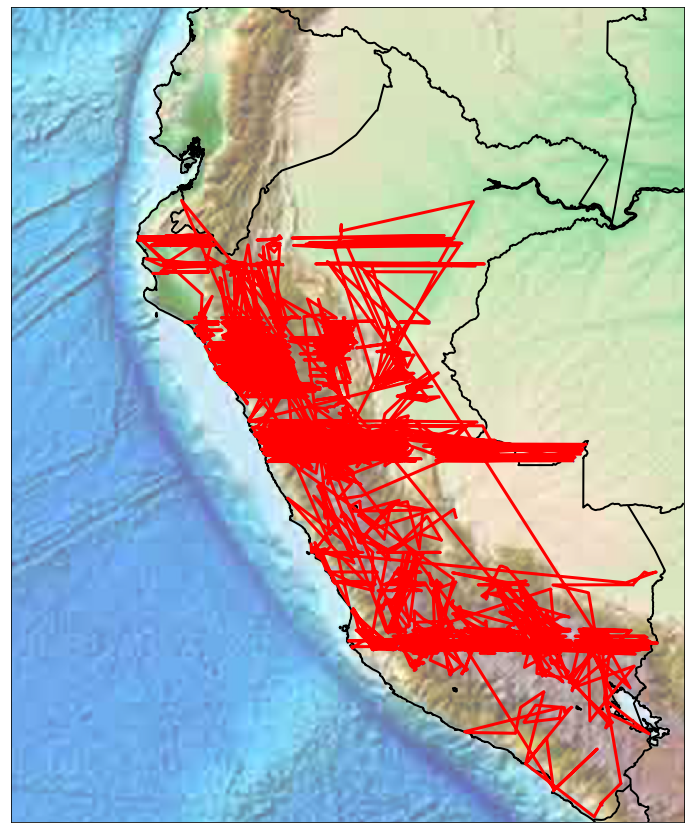

In [21]:
distPrimMap('test15000.csv')